<a href="https://colab.research.google.com/github/woneuy01/AudioToText/blob/master/twitterAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/blob/master/notebooks/Chapter%201%20-%20Mining%20Twitter.ipynb

In [3]:
!pip install twitter

     |████████████████████████████████| 61kB 2.0MB/s 


In [4]:
import twitter
CONSUMER_KEY = '*********************************'
CONSUMER_SECRET = '**************************************************'
OAUTH_TOKEN = '****************************************'
OAUTH_TOKEN_SECRET = '*******************************************'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

In [5]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': '#InsecureHBO', 'url': 'http://twitter.com/search?q=%23InsecureHBO', 'promoted_content': None, 'query': '%23InsecureHBO', 'tweet_volume': 98348}, {'name': '#VidasNegrasImportam', 'url': 'http://twitter.com/search?q=%23VidasNegrasImportam', 'promoted_content': None, 'query': '%23VidasNegrasImportam', 'tweet_volume': 906794}, {'name': '#lacotorrisamerespalda', 'url': 'http://twitter.com/search?q=%23lacotorrisamerespalda', 'promoted_content': None, 'query': '%23lacotorrisamerespalda', 'tweet_volume': None}, {'name': 'Gerardo', 'url': 'http://twitter.com/search?q=Gerardo', 'promoted_content': None, 'query': 'Gerardo', 'tweet_volume': 28215}, {'name': '#BakeOffArgentina', 'url': 'http://twitter.com/search?q=%23BakeOffArgentina', 'promoted_content': None, 'query': '%23BakeOffArgentina', 'tweet_volume': 33330}, {'name': '#protests2020', 'url': 'http://twitter.com/search?q=%23protests2020', 'promoted_content': None, 'query': '%23protests2020', 'tweet_volume': 586547}, {'n

In [6]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#InsecureHBO
#VidasNegrasImportam
#lacotorrisamerespalda
Gerardo
#BakeOffArgentina
#protests2020
渡辺麻友
まゆゆ引退
Avicii
Lanata
Pancasila
Long Beach
Hai Juni
FAKE PRESIDENT
サラーサ
ゼロツー
ユエル
Rakin
Jane Fonda
Juanpa Zurita
jr smith
St. John
Bellevue
#ArgentinaSupportsTrump
#BunkerBoy
#90DayFiance
#LaGuindaDeLaTorta
#KillingEve
#WajidKhan
#PrideMonth
#ForaBol卐onaro
#JusticiaPorPapo
#IbalikAngABSCBN
#MañalichNoSeVa
#Verzuz
#GraciasHugoGatell
#1stAnvTheoryOfLove
#BigParvsSatdehh
#PizzaGate
#出れスパ2020
#AntifasPelaDemocracia
#JusticeforGeorgesFloyd
#MyLovelyFluke24th
#AntifaTERRORISTA
#Miracles_Of_GodKabir
#مسابقه_mna7isa
#Fantastico
#صوره_مطعم_مناحي
#خميس_مشيط


In [7]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

#InsecureHBO
#BunkerBoy
#90DayFiance
#protests2020
#BLACK_LIVES_MATTERS
Santa Monica
FAKE PRESIDENT
St. John
Jane Fonda
Oakland Zoo
Bellevue
Virgil
JR Smith
Kindergarten
Walnut Creek
Sioux Falls
El Super
Marco
Rubio
Druski
AFL-CIO
HAPPY PRIDE MONTH
Waukegan
Broward County
Danny Havoc
Law & Order
Carson mall
Freshman
Dale Murphy
Vans
Hot Topic
lakewood mall
Bogdan Vechirko
#BostonProtests
#RickandMorty
#KillingEve
#JusticeforGeorgesFloyd
#SanBernardino
#JustinCosby
#AntifaTerrorist
#LaCotorrisaMeRespalda


In [8]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends) # common trend for world and us trends.

{'Jane Fonda', '#JusticeforGeorgesFloyd', 'FAKE PRESIDENT', 'St. John', '#BunkerBoy', '#90DayFiance', '#protests2020', '#InsecureHBO', 'Bellevue', '#KillingEve'}


In [11]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#corona virus' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 68
Length of statuses 140
Length of statuses 220
Length of statuses 315
Length of statuses 405
{
 "created_at": "Mon Jun 01 04:49:25 +0000 2020",
 "id": 1267317302288175108,
 "id_str": "1267317302288175108",
 "text": "RT @IhtiramEusafxai: Sari dunya ko #Corona Virus may laga kr #chain nay khud #India Border per #Pubg lgai hui ha\ud83d\ude01\ud83d\ude01",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "Corona",
    "indices": [
     35,
     42
    ]
   },
   {
    "text": "chain",
    "indices": [
     61,
     67
    ]
   },
   {
    "text": "India",
    "indices": [
     77,
     83
    ]
   },
   {
    "text": "Pubg",
    "indices": [
     95,
     100
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "IhtiramEusafxai",
    "name": "Ihtiram EusafXai\ud83d\udd25",
    "id": 1241297159653412866,
    "id_str": "1241297159653412866",
    "indices": [
     3,
     19
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "is

In [12]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @IhtiramEusafxai: Sari dunya ko #Corona Virus may laga kr #chain nay khud #India Border per #Pubg lgai hui ha😁😁
Favorites:  0
Retweets:  0

China targetkan produksi 200 juta dosis vaksin COVID-19
https://t.co/3OlzwYFwUJ

#China #Amerika #Indonesia #virus… https://t.co/48h7s3QOIN
Favorites:  0
Retweets:  0

Lungs Heart Stomach and rest of the human organs made using pencil color
#art 🎨 #drawing #love #coloredpencil… https://t.co/MSj9j0yd1x
Favorites:  0
Retweets:  0

RT @amit_stark007: May whole world get rid of Chinese virus. 
#Corona #COVID19 #CKMKB https://t.co/Bn0yeAzvpv
Favorites:  0
Retweets:  1

May whole world get rid of Chinese virus. 
#Corona #COVID19 #CKMKB https://t.co/Bn0yeAzvpv
Favorites:  1
Retweets:  1

RT @Mdzeeshanayyub: After talking to most of the people, I have realised that the most deadly virus is neither #corona nor #communalvirus,…
Favorites:  0
Retweets:  170

RT @HawtinGibb: WHITE RABBITS 🐇, confirmation from Juan O Savin that the Whitehats TAGGED the Adre

Extracting text, screen names, and hashtags from tweets

In [15]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @IhtiramEusafxai: Sari dunya ko #Corona Virus may laga kr #chain nay khud #India Border per #Pubg lgai hui ha\ud83d\ude01\ud83d\ude01",
 "China targetkan produksi 200 juta dosis vaksin COVID-19\nhttps://t.co/3OlzwYFwUJ\n\n#China #Amerika #Indonesia #virus\u2026 https://t.co/48h7s3QOIN",
 "Lungs Heart Stomach and rest of the human organs made using pencil color\n#art \ud83c\udfa8 #drawing #love #coloredpencil\u2026 https://t.co/MSj9j0yd1x",
 "RT @amit_stark007: May whole world get rid of Chinese virus. \n#Corona #COVID19 #CKMKB https://t.co/Bn0yeAzvpv",
 "May whole world get rid of Chinese virus. \n#Corona #COVID19 #CKMKB https://t.co/Bn0yeAzvpv"
]
[
 "IhtiramEusafxai",
 "amit_stark007",
 "Mdzeeshanayyub",
 "HawtinGibb",
 "georgrestle"
]
[
 "Corona",
 "chain",
 "India",
 "Pubg",
 "China"
]
[
 "RT",
 "@IhtiramEusafxai:",
 "Sari",
 "dunya",
 "ko"
]


Creating a basic frequency distribution from the words in tweets

In [16]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 277), ('the', 269), ('to', 178), ('virus', 171), ('most', 162), ('is', 149), ('#corona', 148), ('of', 145), ('I', 105), ('that', 104)]

[('Mdzeeshanayyub', 77), ('georgrestle', 52), ('mir_sana05', 10), ('jpnncom', 7), ('ghalebalsudmy', 7), ('news_pandemic', 6), ('sandeshnews', 5), ('rtehrani', 5), ('RuchiraC', 5), ('LambaAlka', 5)]

[('corona', 163), ('Corona', 103), ('communalvirus', 77), ('virus', 40), ('coronavirus', 35), ('COVID19', 34), ('covid19', 16), ('CoronaVirus', 11), ('covid', 11), ('Covid_19', 10)]



Using prettytable to display tuples in a nice tabular format

In [17]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+---------+-------+
| Word    | Count |
+---------+-------+
| RT      |   277 |
| the     |   269 |
| to      |   178 |
| virus   |   171 |
| most    |   162 |
| is      |   149 |
| #corona |   148 |
| of      |   145 |
| I       |   105 |
| that    |   104 |
+---------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| Mdzeeshanayyub |    77 |
| georgrestle    |    52 |
| mir_sana05     |    10 |
| jpnncom        |     7 |
| ghalebalsudmy  |     7 |
| news_pandemic  |     6 |
| sandeshnews    |     5 |
| rtehrani       |     5 |
| RuchiraC       |     5 |
| LambaAlka      |     5 |
+----------------+-------+
+---------------+-------+
| Hashtag       | Count |
+---------------+-------+
| corona        |   163 |
| Corona        |   103 |
| communalvirus |    77 |
| virus         |    40 |
| coronavirus   |    35 |
| COVID19       |    34 |
| covid19       |    16 |
| CoronaVirus   |    11 |
| covid         |    11 |
| Covid_19      |    10 |
+---

Calculating lexical diversity for **tweets** **bold text**

In [18]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.3193500424808836
0.356353591160221
0.35091083413231067
18.645544554455444


Finding the most popular retweets¶ **bold text**

In [19]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+---------------+---------------------+----------------------------------------------------+
| Count | Screen Name   | Tweet ID            | Text                                               |
+-------+---------------+---------------------+----------------------------------------------------+
| 51289 | mbahndi       | 1241556884261224449 | RT @mbahndi: masa saat ini ketika kita membaca     |
|       |               |                     | berita atau cerita tentang gejala virus #corona    |
|       |               |                     | atau #COVID19 dan tiba2 kita merasa tenggoro…      |
| 1550  | HawtinGibb    | 1242806520645062659 | RT @HawtinGibb: WHITE RABBITS 🐇, confirmation from |
|       |               |                     | Juan O Savin that the Whitehats TAGGED the         |
|       |               |                     | Adrenochrome with #Corona virus , boom Hollyw…     |
| 1550  | HawtinGibb    | 1242806520645062659 | RT @HawtinGibb: WHITE RABBITS 🐇, confirmati

Looking up users who have retweeted a status

In [20]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'NoNicheNC', 'livingmybestie', 'Rockawaytheday']


Plotting frequencies of words


Text(0.5, 0, 'Word Rank')

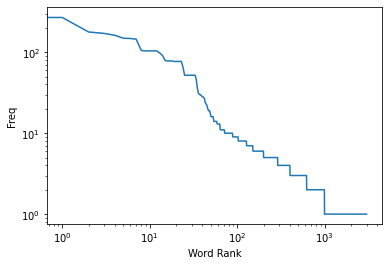

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

Generating histograms of words, screen names, and hashtags

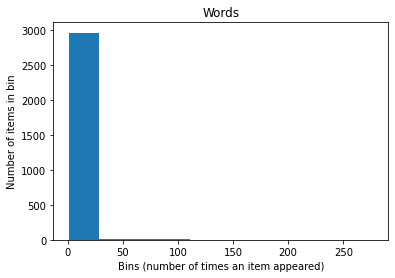

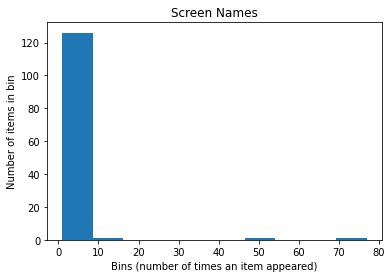

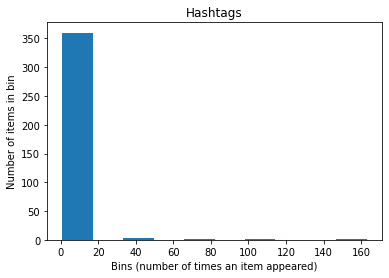

<Figure size 432x288 with 0 Axes>

In [22]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

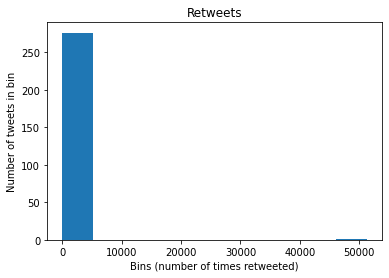

In [23]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

Sentiment Analysis¶ 


In [24]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [0]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [0]:
analyzer = SentimentIntensityAnalyzer()

In [29]:
analyzer.polarity_scores('Hello')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [30]:
analyzer.polarity_scores('I really enjoy this video series.')

{'compound': 0.5413, 'neg': 0.0, 'neu': 0.534, 'pos': 0.466}

In [31]:
analyzer.polarity_scores('I REALLY enjoy this video series.')

{'compound': 0.64, 'neg': 0.0, 'neu': 0.486, 'pos': 0.514}

In [32]:
analyzer.polarity_scores('I REALLY enjoy this video series!!!')

{'compound': 0.7271, 'neg': 0.0, 'neu': 0.439, 'pos': 0.561}

In [33]:
analyzer.polarity_scores('I REALLY did not enjoy this video series!!!')

{'compound': -0.6627, 'neg': 0.425, 'neu': 0.575, 'pos': 0.0}

In [0]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [0]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [36]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.898 : "RT @ncitybase_: nctbase anyone wanna be my friends? i’m a royals who love 21 guys, please don’t interact if you’re a homophobic, suka fan w…"


In [37]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.952 : "RT @loverboywill_: we’re fighting covid, we’re fighting racists, we’re fighting rapists. world really messed up man."
